In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

KeyboardInterrupt: 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.8434 - loss: 0.5373 - val_accuracy: 0.9692 - val_loss: 0.1110
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.9718 - loss: 0.0990 - val_accuracy: 0.9830 - val_loss: 0.0658
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.9826 - loss: 0.0605 - val_accuracy: 0.9867 - val_loss: 0.0547
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9877 - loss: 0.0431 - val_accuracy: 0.9885 - val_loss: 0.0503
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9896 - loss: 0.0351 - val_accuracy: 0.9862 - val_loss: 0.0505
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9773 - loss: 0.0613
Test accuracy: 0.9828000068664551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


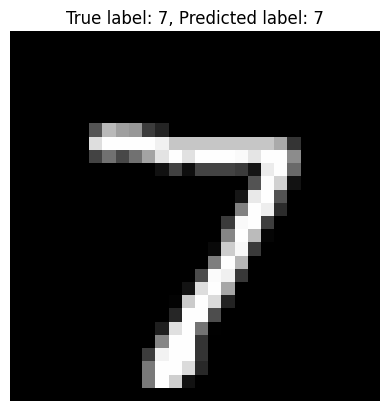

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,
28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
predictions = model.predict(x_test[:1])
predicted_label = np.argmax(predictions[0])
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("True label: %d, Predicted label: %d" % (np.argmax(y_test[0]), predicted_label))
plt.axis('off')
plt.show()